<a href="https://colab.research.google.com/github/cicyfan/machine-learning-fundamentals/blob/master/4_boston_housing_prices_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear versus Ridge Regression 

Your friend Bob just moved to Boston. He is a real estate agent who is trying to evaluate the prices of houses in the Boston area. He has been using a linear regression model but he wonders if he can improve his accuracy on predicting the prices for new houses. He comes to you for help as he knows that you're an expert in machine learning. 

As a pro, you suggest doing a *polynomial transformation*  to create a more flexible model, and performing ridge regression since having so many features compared to data points increases the variance. 

Bob, however, being a skeptic isn't convinced. He wants you to write a program that illustrates the difference in training and test costs for both linear and ridge regression on the same dataset. Being a good friend, you oblige and hence this assignment :) 

In this notebook, you are to explore the effects of ridge regression.  We will use a dataset that is part of the sklearn.dataset package.  Learn more at https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html

## Step 1:  Getting, understanding, and preprocessing the dataset

We first import the standard libaries and some libraries that will help us scale the data and perform some "feature engineering" by transforming the data into $\Phi_2({\bf x})$

In [0]:
import numpy as np
import sklearn
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.linear_model
from sklearn.model_selection import KFold

###  Importing the dataset

In [0]:
# Import the boston dataset from sklearn
boston_data = load_boston()

In [0]:
#  Create X and Y variables - X holding the .data and Y holding .target 
X = boston_data.data
y = boston_data.target

#  Reshape Y to be a rank 2 matrix 
y = y.reshape(X.shape[0], 1)

# Observe the number of features and the number of labels
print('The number of features is: ', X.shape[1])
# Printing out the features
print('The features: ', boston_data.feature_names)
# The number of examples
print('The number of exampels in our dataset: ', X.shape[0])
#Observing the first 2 rows of the data
print(X[0:2])


The number of features is:  13
The features:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
The number of exampels in our dataset:  506
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]]


We will also create polynomial feeatures for the dataset to test linear and ridge regression on data with d = 1 and data with d = 2. Feel free to increase the # of degress and see what effect it has on the training and test error. 

In [0]:
# Create a PolynomialFeatures object with degree = 2. 
# Transform X and save it into X_2. Simply copy Y into Y_2 
poly = PolynomialFeatures(degree=2, include_bias=False)
X_2 = poly.fit_transform(X)
y_2 = y

In [0]:
# the shape of X_2 and Y_2 - should be (506, 105) and (506, 1) respectively
print(X_2.shape)
print(y_2.shape)

(506, 104)
(506, 1)


In [0]:
X.shape

(506, 13)

In [0]:
len(X)

506

# Your code goes here

## Define Functions

Ridge coefficient 
$w = (X^TX+\lambda I)^{-1}X^Ty$

In [0]:
# TODO - Define the get_coeff_ridge_normaleq function. Use the normal equation method.
# TODO - Return w values

def get_coeff_ridge_normaleq(X_train, y_train, alpha):
    # use np.linalg.pinv(a)
    I = np.identity(X_train.shape[1]) # identity of number of features 
    inv = np.linalg.pinv(np.dot(X_train.T, X_train) + alpha*I)
    w = np.dot(inv, X_train.T)
    w = np.dot(w, y_train)
    return w

In [0]:
# TODO - Define the evaluate_err_ridge function.
# TODO - Return the train_error and test_error values

def evaluate_err(X_train, X_test, y_train, y_test, w): 
    train_rss = np.sum(np.power((y_train - np.dot(X_train, w)), 2))
    train_error = train_rss/X_train.shape[0]
    test_rss = np.sum(np.power((y_test - np.dot(X_test, w)), 2))
    test_error = test_rss/X_test.shape[0]
    return train_error, test_error

In [0]:
# TODO - Finish writting the k_fold_cross_validation function. 
# TODO - Returns the average training error and average test error from the k-fold cross validation
# use Sklearns K-Folds cross-validator: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

def k_fold_cross_validation(k, X, y, alpha):
    kf = KFold(n_splits=k, random_state=21, shuffle=True)
    total_E_val_test = 0
    total_E_val_train = 0
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # scaling the data matrix
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Adding a column of 1's to the front of X_train and X_test
        one_col = np.ones((X_train.shape[0],1))
        X_train = np.hstack((one_col, X_train ))
        one_col = np.ones((X_test.shape[0],1))
        X_test  = np.hstack((one_col, X_test ))
        
        # determine the training error and the test error
        w = get_coeff_ridge_normaleq(X_train, y_train, alpha)
        
        train_error, test_error = evaluate_err(X_train, X_test, y_train, y_test, w)
        total_E_val_test += test_error
        total_E_val_train += train_error

    E_val_test = total_E_val_test / k
    E_val_train = total_E_val_train / k

    print("Alpha:","{:2.4f}".format(alpha), "Train average MSE:", "{:1.4f}".format(E_val_train),"Test average MSE:", "{:2.4f}".format(E_val_test))

    return  E_val_test, E_val_train
    


## No Polynomial Transformation

### 10-fold cross validation on linear model

In [0]:
linear_alpha = 0
fold = 10

E_val_test, E_val_train = k_fold_cross_validation(fold, X, y, linear_alpha)

Alpha: 0.0000 Train average MSE: 21.8062 Test average MSE: 23.6361


### 10-fold cross validation on ridge regression model

In [0]:
ridge_alpha = np.logspace(.01, 1, num=13)
train_error = []
test_error = []
alphas = []
for a in ridge_alpha:
    E_val_test, E_val_train = k_fold_cross_validation(fold, X, y, a)
    train_error.append(E_val_train)
    test_error.append(E_val_test)
    alphas.append(a)

Alpha: 1.0233 Train average MSE: 21.8101 Test average MSE: 23.6351
Alpha: 1.2374 Train average MSE: 21.8118 Test average MSE: 23.6359
Alpha: 1.4962 Train average MSE: 21.8144 Test average MSE: 23.6373
Alpha: 1.8093 Train average MSE: 21.8181 Test average MSE: 23.6396
Alpha: 2.1878 Train average MSE: 21.8235 Test average MSE: 23.6432
Alpha: 2.6455 Train average MSE: 21.8313 Test average MSE: 23.6490
Alpha: 3.1989 Train average MSE: 21.8426 Test average MSE: 23.6578
Alpha: 3.8681 Train average MSE: 21.8588 Test average MSE: 23.6711
Alpha: 4.6774 Train average MSE: 21.8821 Test average MSE: 23.6909
Alpha: 5.6559 Train average MSE: 21.9154 Test average MSE: 23.7201
Alpha: 6.8391 Train average MSE: 21.9631 Test average MSE: 23.7629
Alpha: 8.2699 Train average MSE: 22.0310 Test average MSE: 23.8249
Alpha: 10.0000 Train average MSE: 22.1273 Test average MSE: 23.9144


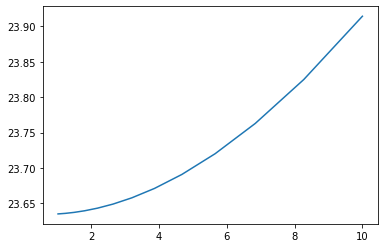

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(alphas, train_error)
plt.plot(alphas, test_error)

#### Try different alpha values

In [0]:
ridge_alpha = np.logspace(0.01, 5, num=15)
train_error = []
test_error = []
alphas = []
for a in ridge_alpha:
    E_val_test, E_val_train = k_fold_cross_validation(fold, X, y, a)
    train_error.append(E_val_train)
    test_error.append(E_val_test)
    alphas.append(a)

Alpha: 1.0233 Train average MSE: 21.8101 Test average MSE: 23.6351
Alpha: 2.3250 Train average MSE: 21.8257 Test average MSE: 23.6448
Alpha: 5.2827 Train average MSE: 21.9021 Test average MSE: 23.7083
Alpha: 12.0029 Train average MSE: 22.2575 Test average MSE: 24.0366
Alpha: 27.2718 Train average MSE: 23.8197 Test average MSE: 25.5422
Alpha: 61.9645 Train average MSE: 30.2010 Test average MSE: 31.8148
Alpha: 140.7899 Train average MSE: 52.9057 Test average MSE: 54.3575
Alpha: 319.8895 Train average MSE: 114.6782 Test average MSE: 115.9562
Alpha: 726.8228 Train average MSE: 226.9257 Test average MSE: 228.0143
Alpha: 1651.4185 Train average MSE: 356.8342 Test average MSE: 357.6679
Alpha: 3752.1977 Train average MSE: 460.2495 Test average MSE: 460.8032
Alpha: 8525.3906 Train average MSE: 524.9875 Test average MSE: 525.3202
Alpha: 19370.5904 Train average MSE: 560.0983 Test average MSE: 560.2963
Alpha: 44012.0329 Train average MSE: 577.4536 Test average MSE: 577.5816
Alpha: 100000.0000 Tra

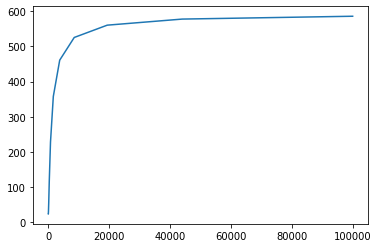

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(alphas, train_error)
plt.plot(alphas, test_error)

## Polynomial Transformation

### 10-fold cross validation on linear model

In [0]:
E_val_test_0, E_val_train_0 = k_fold_cross_validation(fold, X_2, y_2, linear_alpha)

Alpha: 0.0000 Train average MSE: 5.8088 Test average MSE: 11.8550


### 10-fold cross validation on ridge regression model

In [0]:
ridge_alpha = ridge_alpha = np.logspace(.01, 1, num=13)
train_error = []
test_error = []
alphas = []
for a in ridge_alpha:
    E_val_test, E_val_train = k_fold_cross_validation(fold, X_2, y_2, a)
    train_error.append(E_val_train)
    test_error.append(E_val_test)
    alphas.append(a)

Alpha: 1.0233 Train average MSE: 7.4316 Test average MSE: 11.7558
Alpha: 1.2374 Train average MSE: 7.5780 Test average MSE: 11.8364
Alpha: 1.4962 Train average MSE: 7.7344 Test average MSE: 11.9247
Alpha: 1.8093 Train average MSE: 7.9018 Test average MSE: 12.0213
Alpha: 2.1878 Train average MSE: 8.0812 Test average MSE: 12.1271
Alpha: 2.6455 Train average MSE: 8.2741 Test average MSE: 12.2437
Alpha: 3.1989 Train average MSE: 8.4823 Test average MSE: 12.3732
Alpha: 3.8681 Train average MSE: 8.7085 Test average MSE: 12.5188
Alpha: 4.6774 Train average MSE: 8.9562 Test average MSE: 12.6850
Alpha: 5.6559 Train average MSE: 9.2302 Test average MSE: 12.8779
Alpha: 6.8391 Train average MSE: 9.5369 Test average MSE: 13.1052
Alpha: 8.2699 Train average MSE: 9.8845 Test average MSE: 13.3764
Alpha: 10.0000 Train average MSE: 10.2835 Test average MSE: 13.7031


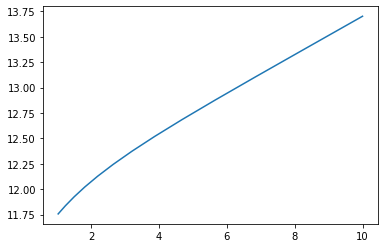

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(alphas, train_error)
plt.plot(alphas, test_error)


#### Try different alpha values

In [0]:
ridge_alpha = np.logspace(0.00001, 5, num=20)
train_error = []
test_error = []
alphas = []
for a in ridge_alpha:
    E_val_test, E_val_train = k_fold_cross_validation(fold, X, y, a)
    train_error.append(E_val_train)
    test_error.append(E_val_test)
    alphas.append(a)

Alpha: 1.0000 Train average MSE: 21.8099 Test average MSE: 23.6350
Alpha: 1.8330 Train average MSE: 21.8184 Test average MSE: 23.6398
Alpha: 3.3599 Train average MSE: 21.8462 Test average MSE: 23.6608
Alpha: 6.1586 Train average MSE: 21.9347 Test average MSE: 23.7373
Alpha: 11.2886 Train average MSE: 22.2088 Test average MSE: 23.9908
Alpha: 20.6917 Train average MSE: 23.0316 Test average MSE: 24.7778
Alpha: 37.9275 Train average MSE: 25.4151 Test average MSE: 27.1012
Alpha: 69.5203 Train average MSE: 31.9837 Test average MSE: 33.5773
Alpha: 127.4292 Train average MSE: 48.5795 Test average MSE: 50.0526
Alpha: 233.5750 Train average MSE: 84.8778 Test average MSE: 86.2218
Alpha: 428.1379 Train average MSE: 149.4756 Test average MSE: 150.6914
Alpha: 784.7676 Train average MSE: 239.1311 Test average MSE: 240.1989
Alpha: 1438.4621 Train average MSE: 335.9593 Test average MSE: 336.8401
Alpha: 2636.6701 Train average MSE: 420.5915 Test average MSE: 421.2626
Alpha: 4832.9595 Train average MSE: 

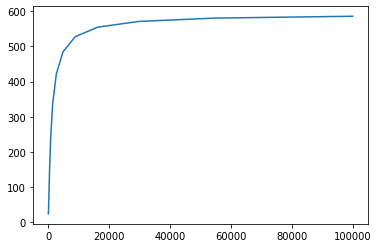

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(alphas, train_error)
plt.plot(alphas, test_error)

### Price Prediction

In [0]:
X_test = np.array([5, 0.5, 2, 0, 4, 8, 4, 6, 2, 2, 2, 4, 5.5]).reshape(1, -1)
X_test_2 = poly.fit_transform(X_test)
X_train = X_2
y_train = y_2
y_train_centered = y_train - np.mean(y_train) # centering the data so we do not need the intercept term 

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test_2 = scaler.transform(X_test_2)

w = get_coeff_ridge_normaleq(X_train, y_train_centered, 1.0233 )
prediction = np.dot(X_test_2, w) + np.mean(y_train)
print("Predicted Price: ", "{:1.4f}".format(prediction[0][0]))

Predicted Price:  25.6270
